In [11]:
import numpy as np
import transforms3d as tf3d

import vedo
# 加载网格数据
mesh = vedo.load(r"D:\data\crown_data\crown_data_V3\16_test\J10166160052_16\scanning_model\J10166160052_UpperJaw.stl")
# 定义仿射变量
"""
transforms3d.affines.compose(T、R、Z、S=无)
将平移、旋转、缩放、[剪切] 组合为仿射

参数
T阵列状 （N，）
翻译，其中 N 通常为 3（3D 大小写）

R阵列状 （N，N）
N 通常为 3 的旋转矩阵（3D 情况）

Z阵列状 （N，）
缩放，其中 N 通常为 3（3D 情况）

S类数组，形状 （P，），可选
剪切矢量，使得剪切填充上方的上三角形 对角线形成剪切基体。P 是第 （N-2） 个三角形 number，对于 4x4 仿射（3D 情况），恰好是 3

返回
一个数组，形状 （N+1， N+1）
仿射变换矩阵，其中 N 通常 == 3 （3D 案例）

变幻的顺序是：剪贴，然后是 缩放，然后旋转，然后平移
"""
T = [2, 5, 3]
R = [[0, -1, 0], [1, 0, 0], [0, 0, 1]]
Z = [0.5, 0.5, 2.0]
A = tf3d.affines.compose(T, R, Z)  # 构建放射变幻矩阵
print(A)


[[ 0.  -0.5  0.   2. ]
 [ 0.5  0.   0.   5. ]
 [ 0.   0.   2.   3. ]
 [ 0.   0.   0.   1. ]]


In [12]:
S = np.zeros(3)
B = tf3d.affines.compose(T, R, Z, S)  # 构建剪切变幻矩阵
print(B)

[[ 0.  -0.5  0.   2. ]
 [ 0.5  0.   0.   5. ]
 [ 0.   0.   2.   3. ]
 [ 0.   0.   0.   1. ]]


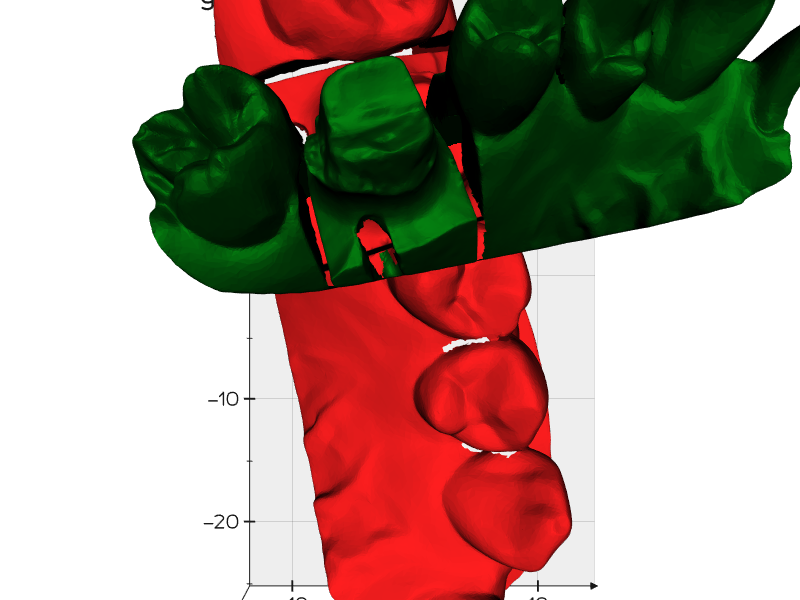

In [13]:
mesh_aff = mesh.clone().apply_transform(A)  # 应用仿射变换
vedo.show([mesh_aff.c("green"), mesh.c("red")], axes=1)  # 显示网格